In [56]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [57]:
import kaggle

# Set the Kaggle API credentials
kaggle.api.authenticate()

# Download the dataset
kaggle.api.dataset_download_files('berkeleyearth/climate-change-earth-surface-temperature-data', path='./dataset', unzip=True)


In [58]:
files = os.listdir('./dataset')

for file in files:
    if file != 'GlobalLandTemperaturesByMajorCity.csv':
        os.remove(os.path.join('./dataset', file))


In [59]:
df = pd.read_csv('./dataset/GlobalLandTemperaturesByMajorCity.csv')
df.head

<bound method NDFrame.head of                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N  

In [60]:
df.drop(['City', 'Latitude', 'Longitude'], axis = 1, inplace = True)
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1849-01-01,26.704,1.435,Côte D'Ivoire
1,1849-02-01,27.434,1.362,Côte D'Ivoire
2,1849-03-01,28.101,1.612,Côte D'Ivoire
3,1849-04-01,26.140,1.387,Côte D'Ivoire
4,1849-05-01,25.427,1.200,Côte D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [61]:
df['dt'] = pd.to_datetime(df['dt'])
get_data = (df['dt'] > '1945-01-01') & (df['dt'] <= '2013-09-01')
df.loc[get_data]

df = df.loc[get_data]
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1153,1945-02-01,27.933,0.394,Côte D'Ivoire
1154,1945-03-01,28.512,0.354,Côte D'Ivoire
1155,1945-04-01,27.967,0.438,Côte D'Ivoire
1156,1945-05-01,27.193,0.301,Côte D'Ivoire
1157,1945-06-01,25.786,0.237,Côte D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [62]:
df = df.loc[df['Country'].isin(['China'])]
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
48532,1945-02-01,-15.565,0.575,China
48533,1945-03-01,-4.664,0.356,China
48534,1945-04-01,8.177,0.562,China
48535,1945-05-01,12.963,0.447,China
48536,1945-06-01,19.603,0.561,China
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [63]:
df.drop(['Country'], axis = 1, inplace = True)
df.reset_index(drop = True)

,dt,AverageTemperature,AverageTemperatureUncertainty
0,1945-02-01,-15.565,0.575
1,1945-03-01,-4.664,0.356
2,1945-04-01,8.177,0.562
3,1945-05-01,12.963,0.447
4,1945-06-01,19.603,0.561
...,...,...,...
13179,2013-05-01,18.979,0.807
13180,2013-06-01,23.522,0.647
13181,2013-07-01,25.251,1.042
13182,2013-08-01,24.528,0.840


In [64]:
df.isnull().sum()

dt                                0
AverageTemperature               16
AverageTemperatureUncertainty    16
dtype: int64

In [65]:
df.dropna(subset = ['AverageTemperature'], inplace = True)
df.dropna(subset = ['AverageTemperatureUncertainty'], inplace = True)
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
dtype: int64

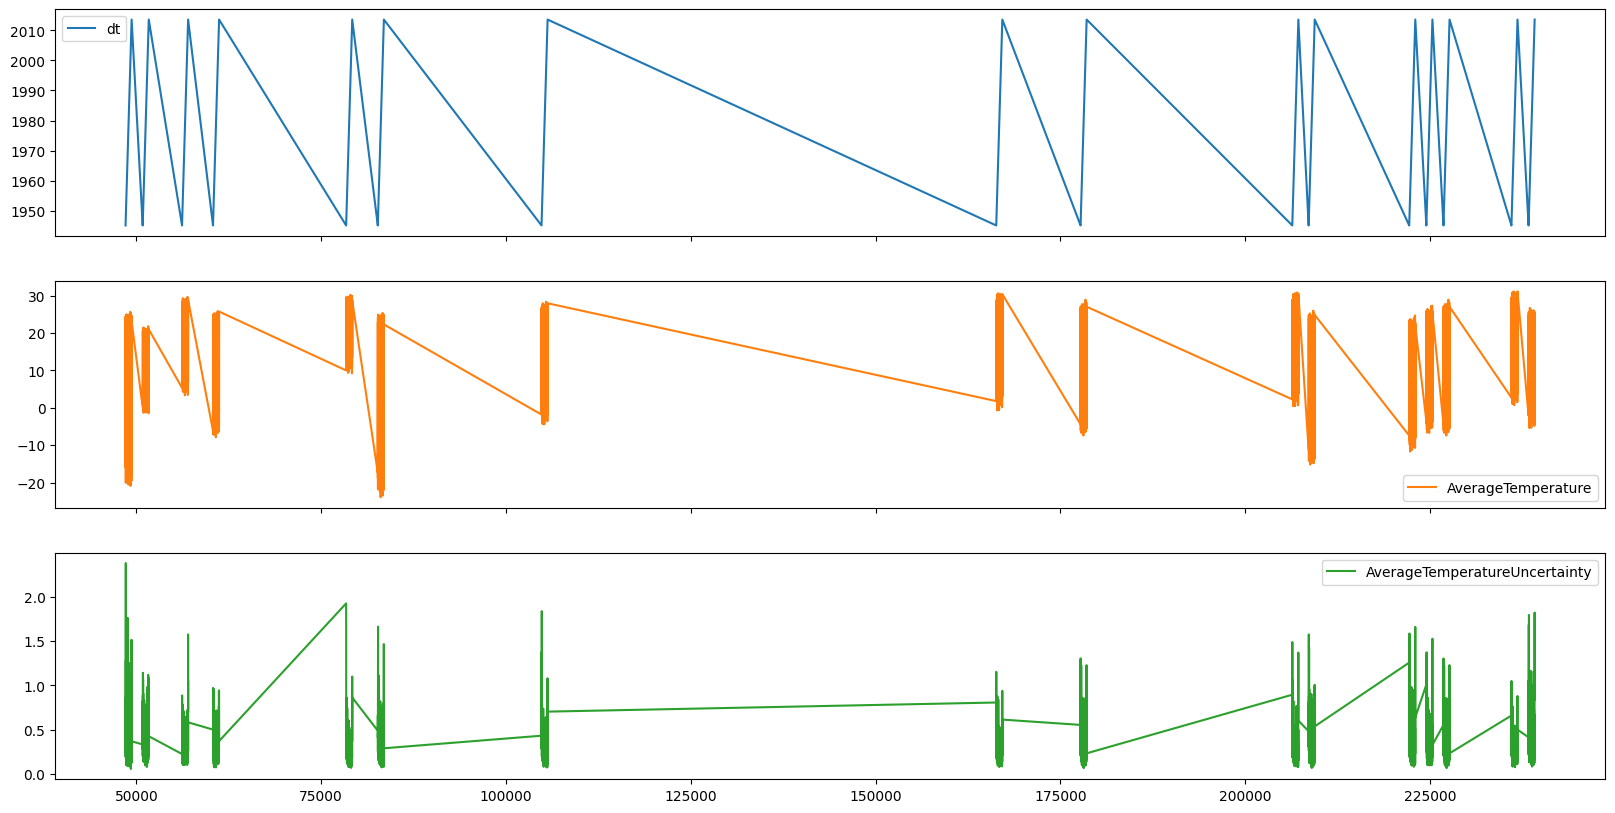

In [66]:
df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots = True, figsize = (20, 10))
plt.show()

Text(0.5, 0, 'Datetime')

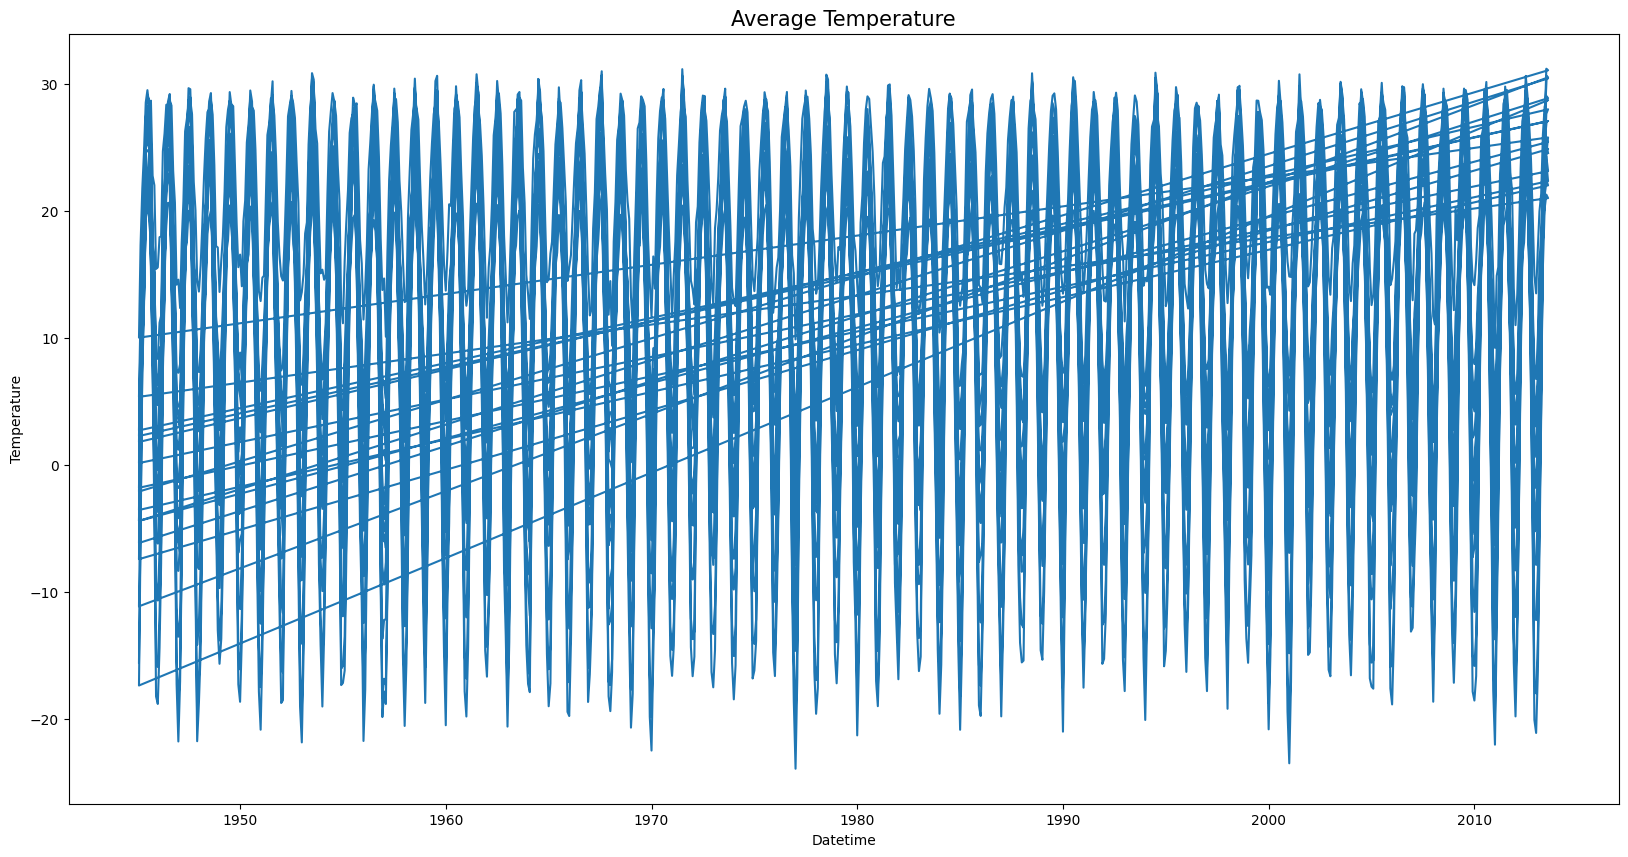

In [67]:
dates = df['dt'].values
temp = df['AverageTemperature'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize = (20, 10))
plt.plot(dates, temp)

plt.title('Average Temperature', fontsize = 15)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

In [68]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
dtype: object

In [69]:
# split dataset
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size = 0.8, test_size = 0.2, shuffle = False)

print('Jumlah Data Train : ', len(x_train))
print('Jumlah Data Validation : ', len(x_valid))

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis = -1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift = 1, drop_remainder = True)
  ds = ds.flat_map(lambda w : w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w : (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

Jumlah Data Train :  10534
Jumlah Data Validation :  2634


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size = 64, batch_size = 200, shuffle_buffer = 1000)
val_set = windowed_dataset(x_valid, window_size = 64, batch_size = 200, shuffle_buffer = 1000)

model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [71]:
Mae = (df['AverageTemperature'].max() - df['AverageTemperature'].min()) * 10/100
print(Mae)

5.5093000000000005


In [72]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 5.5 and logs.get('val_mae') < 5.5):
      print("Mae < 10% data")
      self.model.stop_training = True
callbacks = myCallback()

In [74]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

Epoch 1/100
53/53 [==============================] - 13s 165ms/step - loss: 13.9109 - mae: 14.4049 - val_loss: 13.8717 - val_mae: 14.3637
Epoch 2/100
53/53 [==============================] - 8s 145ms/step - loss: 13.7961 - mae: 14.2901 - val_loss: 13.7997 - val_mae: 14.2915
Epoch 3/100
53/53 [==============================] - 8s 152ms/step - loss: 13.7331 - mae: 14.2270 - val_loss: 13.7327 - val_mae: 14.2247
Epoch 4/100
53/53 [==============================] - 8s 148ms/step - loss: 13.6736 - mae: 14.1673 - val_loss: 13.6662 - val_mae: 14.1585
Epoch 5/100
53/53 [==============================] - 8s 147ms/step - loss: 13.6120 - mae: 14.1056 - val_loss: 13.5939 - val_mae: 14.0866
Epoch 6/100
53/53 [==============================] - 8s 145ms/step - loss: 13.5429 - mae: 14.0364 - val_loss: 13.5110 - val_mae: 14.0043
Epoch 7/100
53/53 [==============================] - 8s 146ms/step - loss: 13.4628 - mae: 13.9565 - val_loss: 13.4133 - val_mae: 13.9070
Epoch 8/100
53/53 [=====================

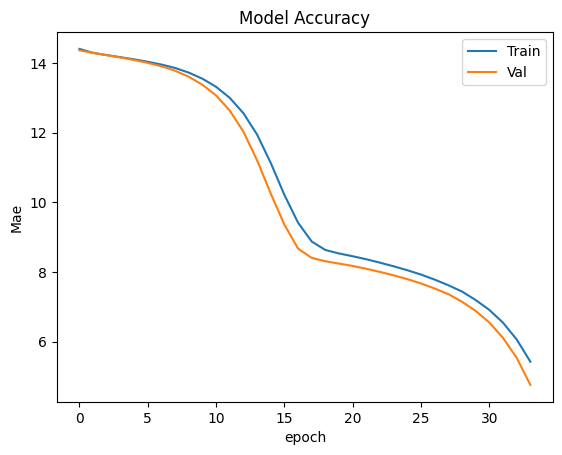

In [75]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Mae')
plt.legend(['Train', 'Val'], loc = 'best')
plt.show()

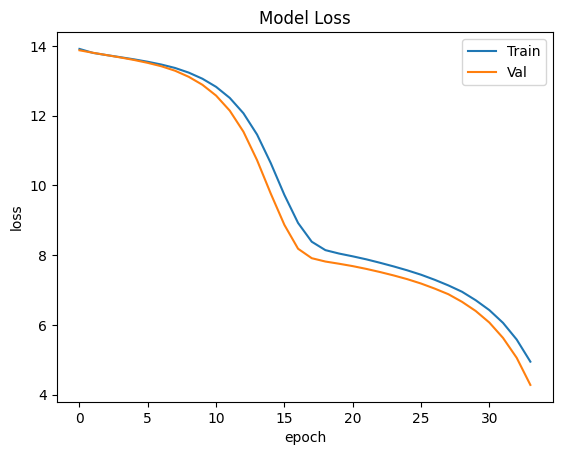

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc = 'best')
plt.show()